# Assignment # 3 by Obaidullah GCS 1947

In [75]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt


np.set_printoptions(threshold=np.inf)



In [76]:

df = pd.read_csv('iris.data', header=None)
df = df.drop(4, axis=1)


In [77]:
#make two copies of Data, 
# data and datap 
# Take each row of data and cycle through each row of Datap

data = df.to_numpy()
datap = data.copy()

records, col = data.shape

In [78]:


crm = np.zeros(records*records).reshape(records,records)


In [79]:

#calculate the Pearson's Coefficient for each row with other row

counter = 0
product1 = 0
denominator = 0
for idx, row in enumerate(data):
    for jdx, irow in enumerate(datap):
        # X is the data row
        x = np.subtract(row, np.mean(row));
        # Y is the row from Datap
        y = np.subtract(irow, np.mean(irow));
        
        # SQRX is the sum of all mean subtracted X's Squared 
        sqrx = np.sum(np.power(np.subtract(row, np.mean(row)),2));
       
        #SQRI is the sum of all mean subtracted Y's
        sqirow = np.sum(np.power(np.subtract(irow, np.mean(irow)),2));
        
        # Calculate their Denominator and Numerator
        numerator = np.sum(np.multiply(x,y));
        deno = np.power(np.multiply(sqrx,sqirow), 0.5);
        
        #Calculate Pearson cofficient between X and Y
        r = np.divide(numerator, deno);
        crm[idx, jdx] = r
    
  

# Uncomment this line below to print the Coefficient Matrix 
#print(crm)       
        
        

In [80]:
#  THresholding Mean / Median Values in the Matrix
colmean = np.mean(crm, axis=0)
colmedian = np.median(crm, axis=0)


threshold = np.divide(colmean,colmedian)


In [81]:

for idx, col in enumerate(crm.T):
    for jdx, value in enumerate(col):
        
       # Descritize the Matrix correlation matrix CRM

        if value > threshold[idx]:
            crm.T[idx,jdx] = 1
           
        else:
            crm.T[idx,jdx] = 0    
            

        

In [82]:
#Run THis to Print coefficient Matrix


#print(crm)

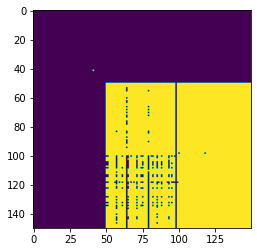

In [83]:
plt.imshow(crm)
plt.show()